In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.arima_model import ARIMA
# from nsepy import get_history
import yfinance as yf 
import datetime as dt
import warnings
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

In [50]:
startYear = int(2018)
startMonth = int(7)
startDay = int(15)

endYear = int(2019)
endMonth = int(11)
endDay = int(4)

tickerSymbol = "BATAINDIA.NS"
# tickerSymbol = "SUPREMEIND"
# tickerSymbol = "BATAINDIA"
# tickerSymbol = "SUNPHARMA"
# tickerSymbol = "TTKPRESTIG"

startDate = dt.date(startYear,startMonth,startDay)
endDate = dt.date(endYear,endMonth,endDay)

data = yf.download(tickerSymbol,startDate,endDate)
# data = get_history(symbol=tickerSymbol, start=startDate, end=endDate)

[*********************100%***********************]  1 of 1 completed


In [45]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-18,1740.000000,1780.000000,1736.150024,1769.099976,1769.099976,898576
2019-10-22,1773.750000,1804.949951,1742.150024,1767.849976,1767.849976,767897
2019-10-23,1766.800049,1787.949951,1762.000000,1772.949951,1772.949951,355155
2019-10-24,1786.099976,1792.400024,1771.099976,1789.699951,1789.699951,280794
2019-10-25,1777.300049,1797.000000,1754.550049,1763.500000,1763.500000,594439
2019-10-29,1778.000000,1791.550049,1755.000000,1781.650024,1781.650024,389498
2019-10-30,1789.000000,1789.000000,1764.050049,1780.199951,1780.199951,353785
2019-10-31,1785.300049,1814.000000,1779.349976,1806.900024,1806.900024,1065878
2019-11-01,1802.000000,1810.150024,1732.900024,1741.250000,1741.250000,841640


In [46]:
indexClosingPrice = data.Close

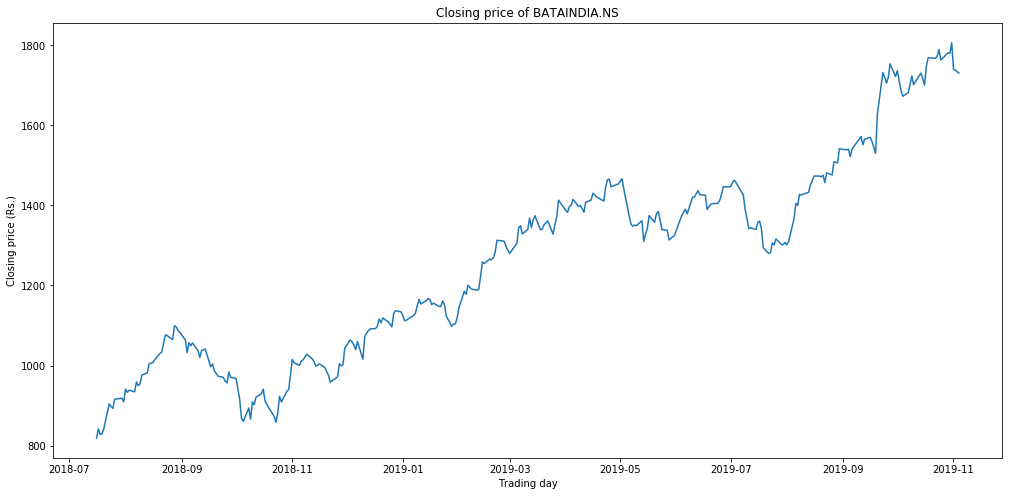

In [47]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(17, 8))
plt.plot(indexClosingPrice)
plt.title('Closing price of '+ tickerSymbol)
plt.ylabel('Closing price (Rs.)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

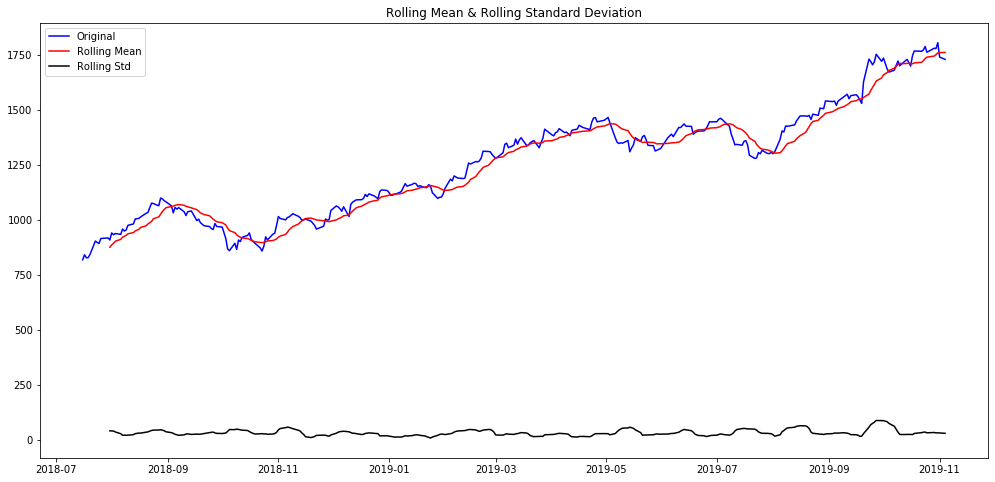

In [48]:
warnings.filterwarnings("ignore")
rolling_mean = indexClosingPrice.rolling(window = 12).mean()
rolling_std = indexClosingPrice.rolling(window = 12).std()
plt.figure(figsize=(17, 8))
plt.plot(indexClosingPrice, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [13]:
result = adfuller(indexClosingPrice)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -0.6055654911232832
p-value: 0.869719488263485
Critical Values:
	1%: -3.4513486122290717
	5%: -2.870789013306053
	10%: -2.5716978530569192


Text(0.5, 1.0, 'Log of Index Closing Price')

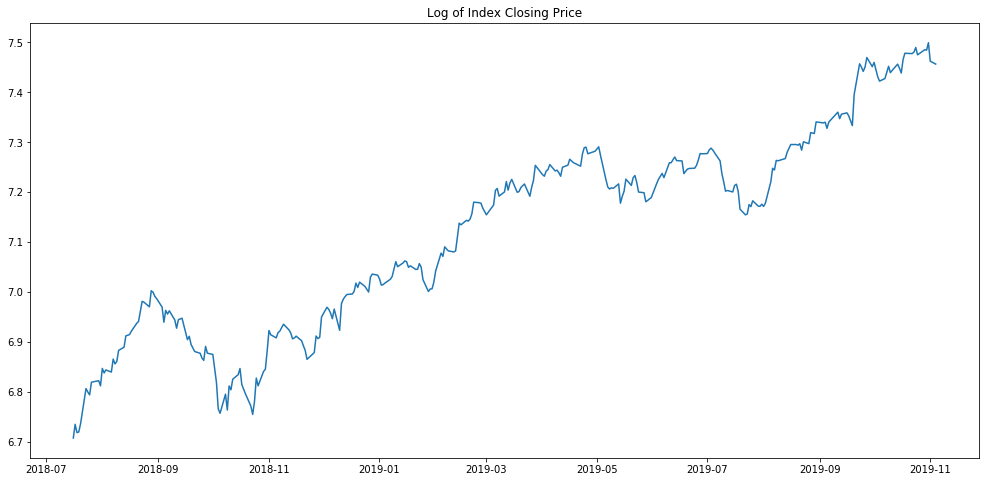

In [40]:
indexClosingPrice_log = pd.Series(np.log(indexClosingPrice))
plt.figure(figsize=(17, 8))
plt.plot(indexClosingPrice_log)
plt.title('Log of Index Closing Price')

In [15]:


def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    plt.figure(figsize=(17, 8))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

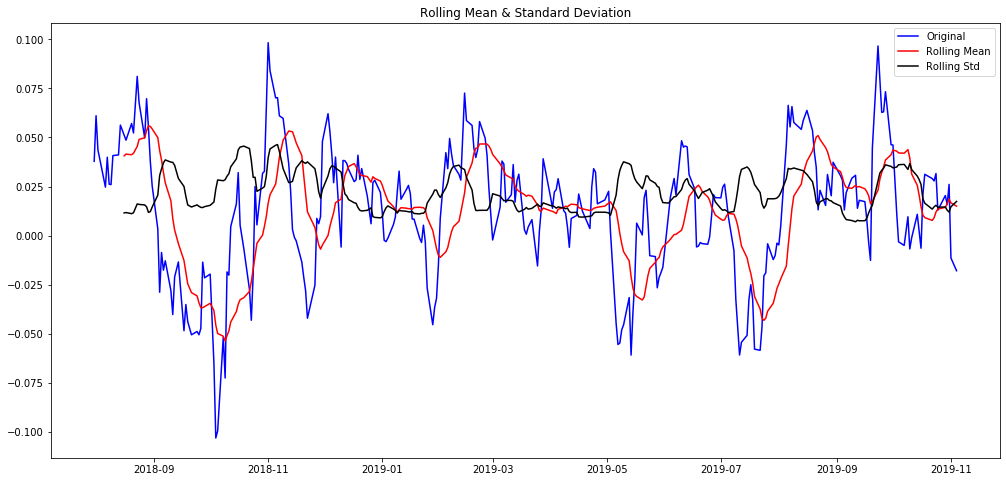

ADF Statistic: -4.997113942107464
p-value: 2.2486895357726574e-05
Critical Values:
	1%: -3.452263435801039
	5%: -2.871190526189069
	10%: -2.571911967527952


In [16]:
# subtract the rolling mean
rolling_mean = indexClosingPrice_log.rolling(window=12).mean()
indexClosingPrice_log_minus_mean = indexClosingPrice_log - rolling_mean
indexClosingPrice_log_minus_mean.dropna(inplace=True)
get_stationarity(indexClosingPrice_log_minus_mean)

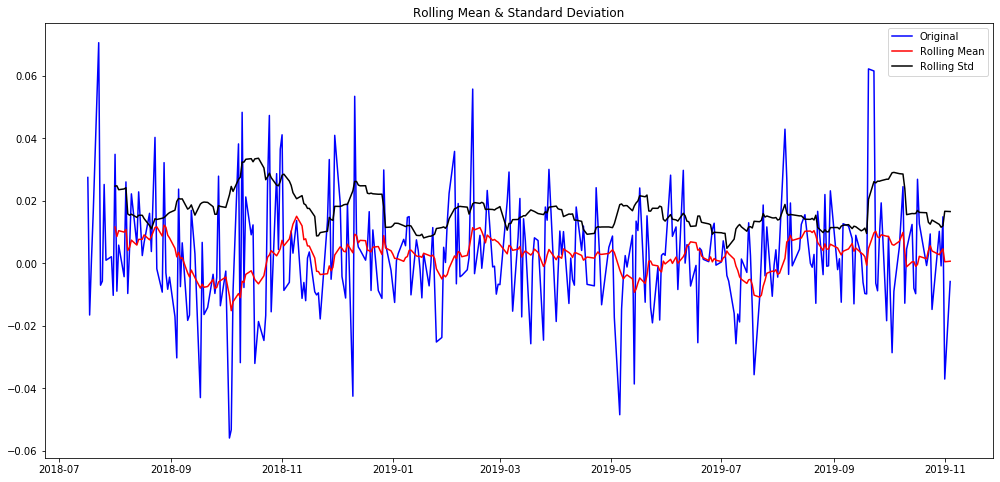

ADF Statistic: -17.020927273883952
p-value: 8.458056321164871e-30
Critical Values:
	1%: -3.4514162625887037
	5%: -2.8708187088091406
	10%: -2.5717136883095675


In [17]:
#When applying time shifting, we subtract every the point by the one that preceded it.
# null, (x1−x0), (x2−x1), (x3−x2), (x4−x3), …, (xn−xn−1)
indexClosingPrice_log_shift = indexClosingPrice_log - indexClosingPrice_log.shift()
indexClosingPrice_log_shift.dropna(inplace=True)
get_stationarity(indexClosingPrice_log_shift)

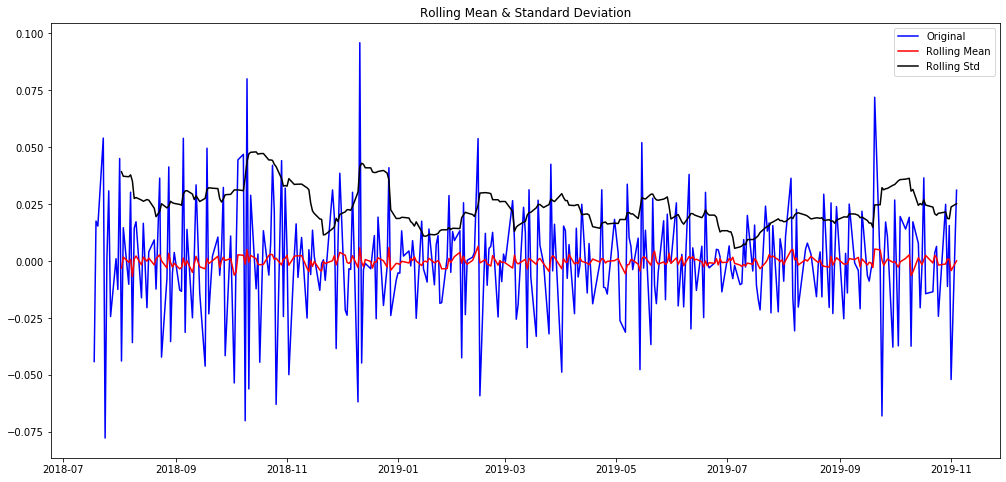

ADF Statistic: -7.727267948652831
p-value: 1.150130291750857e-11
Critical Values:
	1%: -3.4525611751768914
	5%: -2.87132117782556
	10%: -2.5719816428028888


In [18]:
#Double Differencing

# The results show that the test statistic value  is smaller than the critical value at 5% . This 
# suggests that we can reject the null hypothesis with a significance level of less than 5% (i.e. a low probability 
# that the result is a statistical fluke).  Rejecting the null hypothesis means that the process has no unit root, 
# and in turn that the time series is stationary or does not have time-dependent structure.

indexClosingPrice_log_shift_twice = indexClosingPrice_log_shift - indexClosingPrice_log_shift.shift()
indexClosingPrice_log_shift_twice.dropna(inplace=True)
get_stationarity(indexClosingPrice_log_shift_twice)

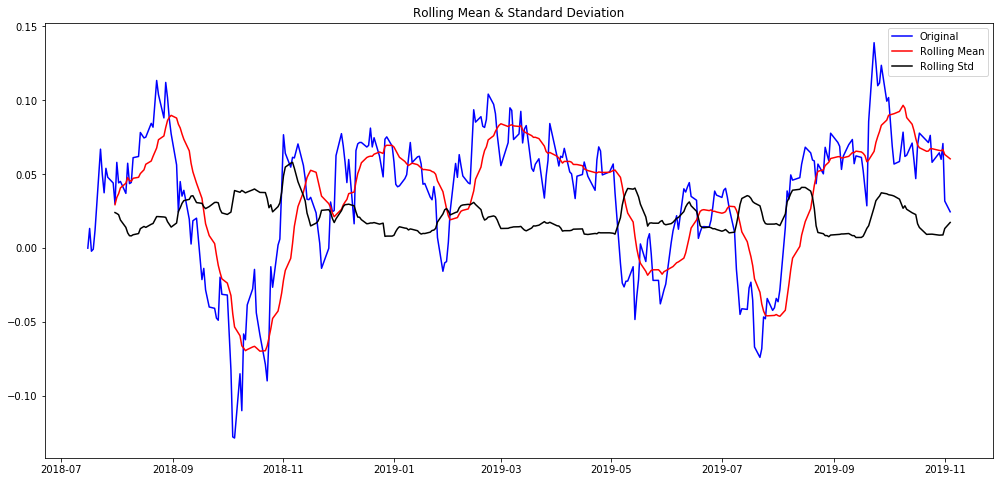

ADF Statistic: -3.328459163188808
p-value: 0.01365329744195357
Critical Values:
	1%: -3.4513486122290717
	5%: -2.870789013306053
	10%: -2.5716978530569192


In [19]:
#Exponential Decay
rolling_mean_expDecay = indexClosingPrice_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
indexClosingPrice_log_expDecay = indexClosingPrice_log - rolling_mean_expDecay
indexClosingPrice_log_expDecay.dropna(inplace=True)
get_stationarity(indexClosingPrice_log_expDecay)

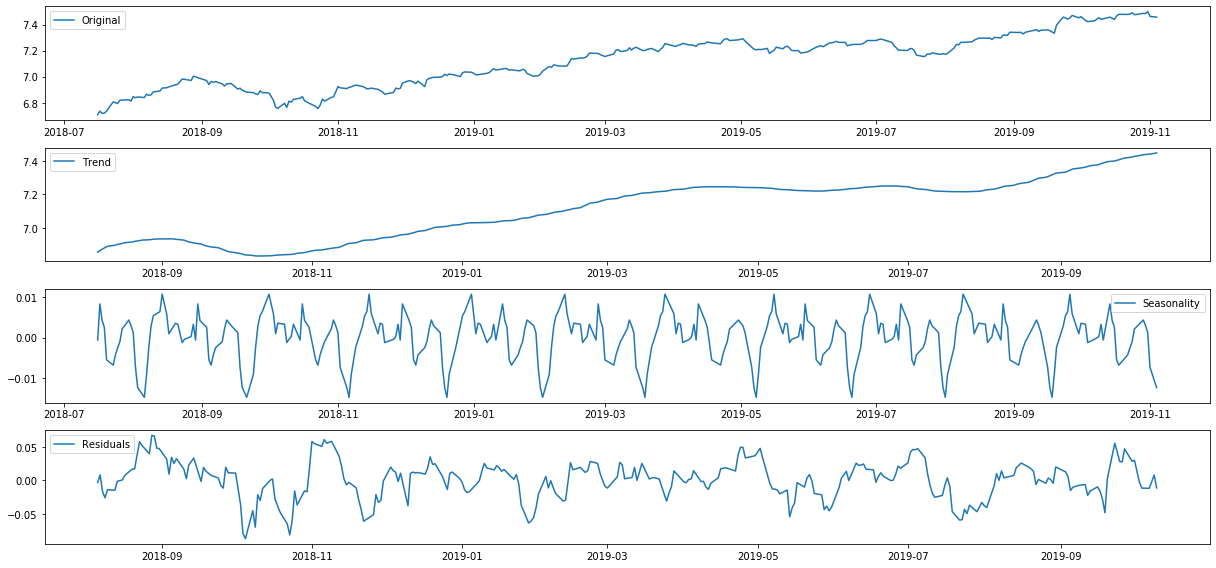

In [20]:
# Seasonal decomposition
#Decompose the data to observe its trend and seasonality.
# the time series data has an observable trend, which means it is dependent on time. It is therefore not stationary.
from statsmodels.tsa.seasonal import seasonal_decompose
# decomposition = seasonal_decompose(indexClosingPrice_log, freq=30)
decomposition = seasonal_decompose(indexClosingPrice_log, freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(17, 8))
plt.subplot(411)
plt.plot(indexClosingPrice_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


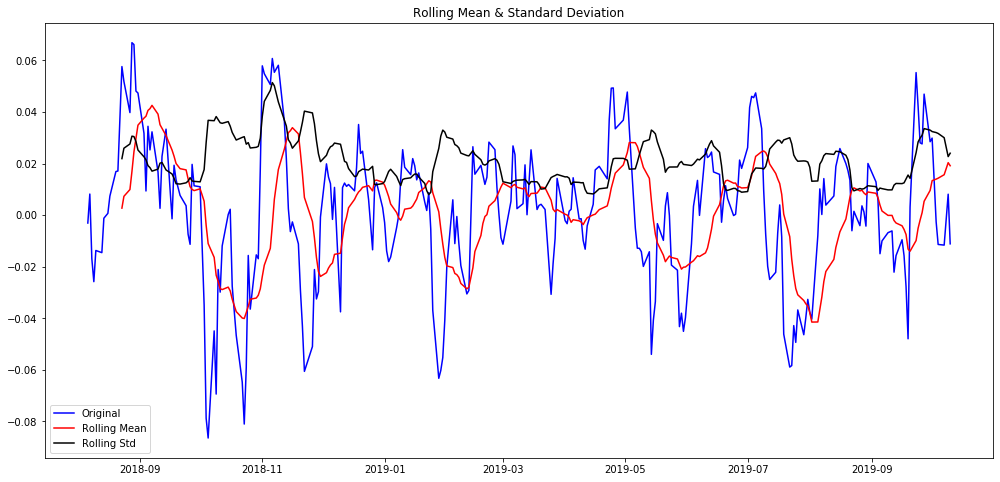

ADF Statistic: -5.522187908258149
p-value: 1.866848593572775e-06
Critical Values:
	1%: -3.453670163592738
	5%: -2.8718077069772248
	10%: -2.5722411158835796


In [21]:
# trend, seasonality are separated out from data and  model the residuals.
# Lets check stationarity of residuals:
indexClosingPrice_log_decompose = residual
indexClosingPrice_log_decompose.dropna(inplace=True)
get_stationarity(indexClosingPrice_log_decompose)

In [22]:
# Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary.

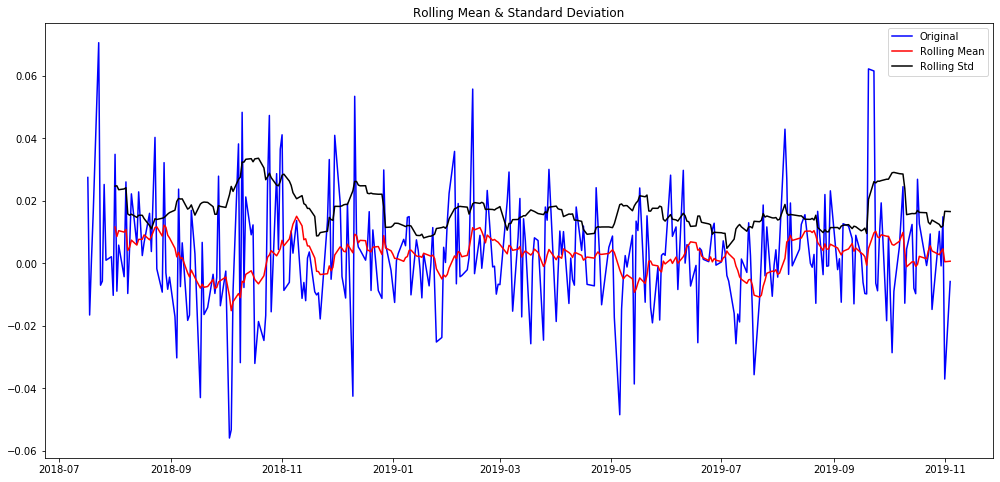

ADF Statistic: -17.020927273883952
p-value: 8.458056321164871e-30
Critical Values:
	1%: -3.4514162625887037
	5%: -2.8708187088091406
	10%: -2.5717136883095675


In [23]:
#Differencing - 1
indexClosingPrice_log_diff= indexClosingPrice_log- indexClosingPrice_log.shift()
indexClosingPrice_log_diff.dropna(inplace=True)
get_stationarity(indexClosingPrice_log_diff)

In [52]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
# lag_acf = acf(indexClosingPrice_log_diff, nlags=20,fft=False)

# This can happen when there are inf or nan values in the data.  Use this to remove nan values:
# indexClosingPrice_log_diff.dropna(inplace=True)
# lag_acf = acf(indexClosingPrice_log_diff, nlags=20)
# lag_pacf = pacf(indexClosingPrice_log_diff, nlags=20, method='ols')

indexClosingPrice_log_diff.dropna(inplace=True)
lag_acf = acf(indexClosingPrice_log_diff, nlags=5)
lag_pacf = pacf(indexClosingPrice_log_diff, nlags=5, method='ols')

#OLS-Ordinary least squared: regression of time series on lags of it and on constant
#largest lag for which the pacf is returned


Text(0.5, 1.0, 'Autocorrelation Function')

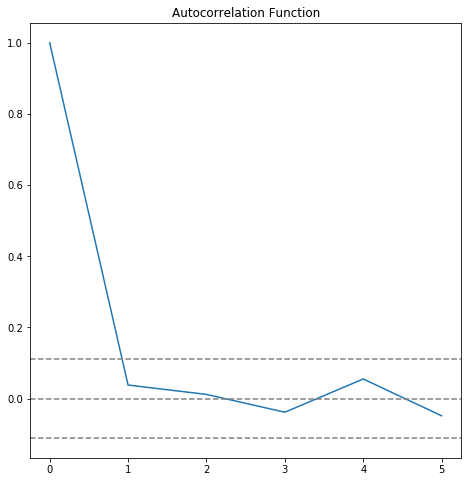

In [61]:
#Plot ACF:
plt.figure(figsize=(17, 8))
plt.subplot(122) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexClosingPrice_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexClosingPrice_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

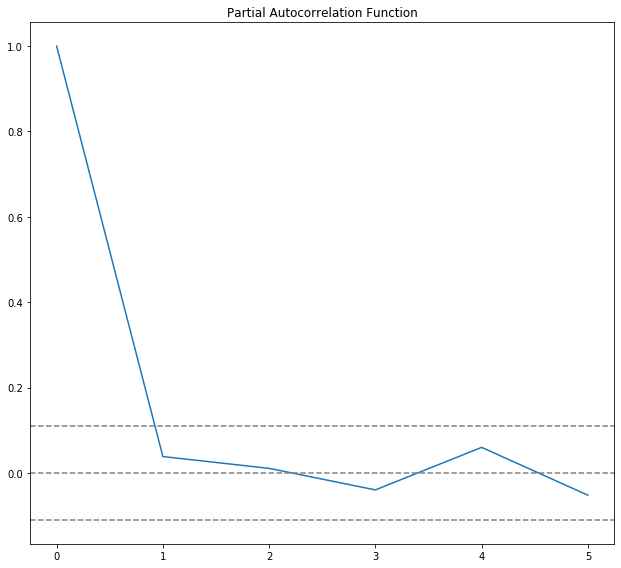

In [60]:
#Plot PACF:
plt.figure(figsize=(17, 8))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexClosingPrice_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexClosingPrice_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [62]:
#Method-2 to plot acf, pacf

# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.graphics.tsaplots import plot_pacf

# plot_acf(indexClosingPrice_log_diff, ax=plt.gca())
# # plot_acf(indexClosingPrice_log_diff, ax=plt.gca())
# plt.show()
# plot_pacf(indexClosingPrice_log_diff, ax=plt.gca())
# # plot_pacf(indexClosingPrice_log_diff, ax=plt.gca())
# plt.show()

In [ ]:
# #Method -1 to determine p,q,d

# from sklearn.metrics import mean_squared_error
# from math import sqrt
# # evaluate an ARIMA model for a given order (p,d,q) and return RMSE
# def evaluate_arima_model(X, arima_order):
#     # prepare training dataset
#     X = X.astype('float32')
#     train_size = int(len(X) * 0.50)
#     train, test = X[0:train_size], X[train_size:]
#     history = [x for x in train]
#     # make predictions
#     predictions = list()
#     for t in range(len(test)):
#         model = ARIMA(history, order=arima_order)
#         model_fit = model.fit(disp=0)
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         history.append(test[t])
#     # calculate out of sample error
#     mse = mean_squared_error(test, predictions)
#     rmse = sqrt(mse)
#     return rmse
# # evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
#     dataset = dataset.astype('float32')
#     best_score, best_cfg = float("inf"), None
#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 order = (p,d,q)
#                 try:
#                     mse = evaluate_arima_model(dataset, order)
#                     if mse < best_score:
#                         best_score, best_cfg = mse, order
#                     print('ARIMA%s MSE=%.3f' % (order,mse))
#                 except:
#                     continue
#     print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

# # evaluate parameters
# p_values = range(0,13)
# d_values = range(0, 4)
# q_values = range(0, 13)
# warnings.filterwarnings("ignore")
# evaluate_models(indexClosingPrice_log, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=326.096
ARIMA(0, 0, 1) MSE=173.944
ARIMA(0, 1, 0) MSE=23.642
ARIMA(0, 1, 1) MSE=23.722
ARIMA(0, 1, 2) MSE=23.795
ARIMA(0, 1, 3) MSE=23.741


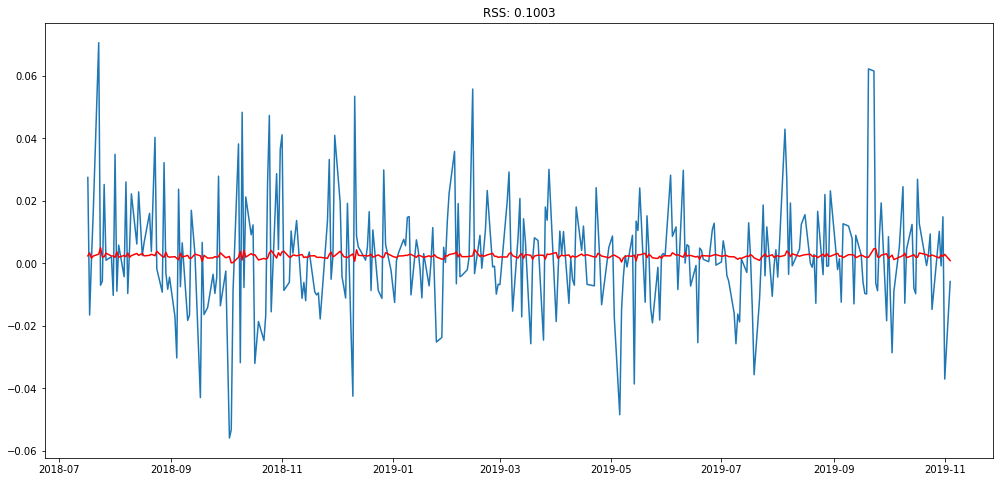

In [65]:
#Method-2

#Auto Regression (AR) Model



# p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
# If you notice closely, in this case p=1.

# q – The lag value where the ACF chart crosses the upper confidence interval for the first time. 
# If you notice closely, in this case q=1.

# RSS to check if a statistical model is a good fit for data.residual is a measure of the distance from a data point to a regression line

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(indexClosingPrice_log, order=(1, 1, 0))  
results_AR = model.fit()
plt.figure(figsize=(17, 8))
plt.plot(indexClosingPrice_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-indexClosingPrice_log_diff)**2))
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'RSS: 0.1003')

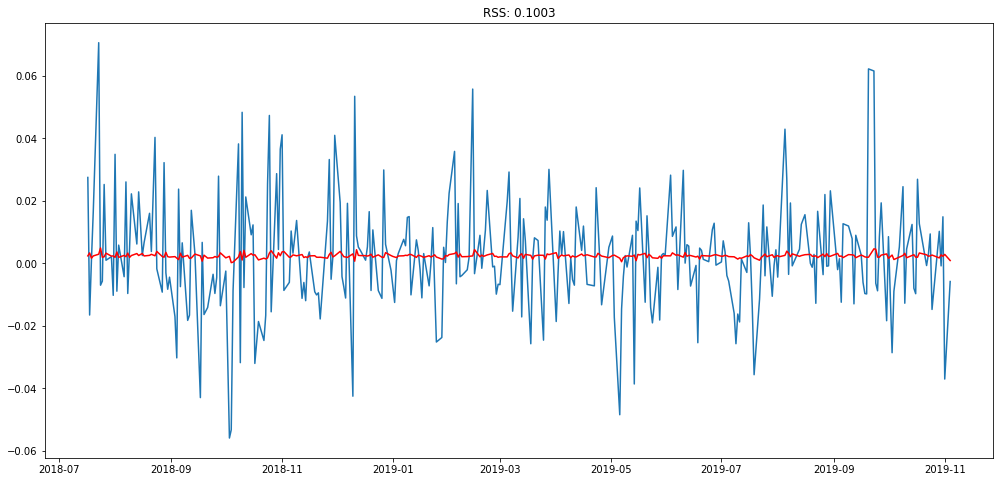

In [29]:
#Moving Average (MA) Model

model = ARIMA(indexClosingPrice_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(17, 8))
plt.plot(indexClosingPrice_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-indexClosingPrice_log_diff)**2))
warnings.filterwarnings("ignore")

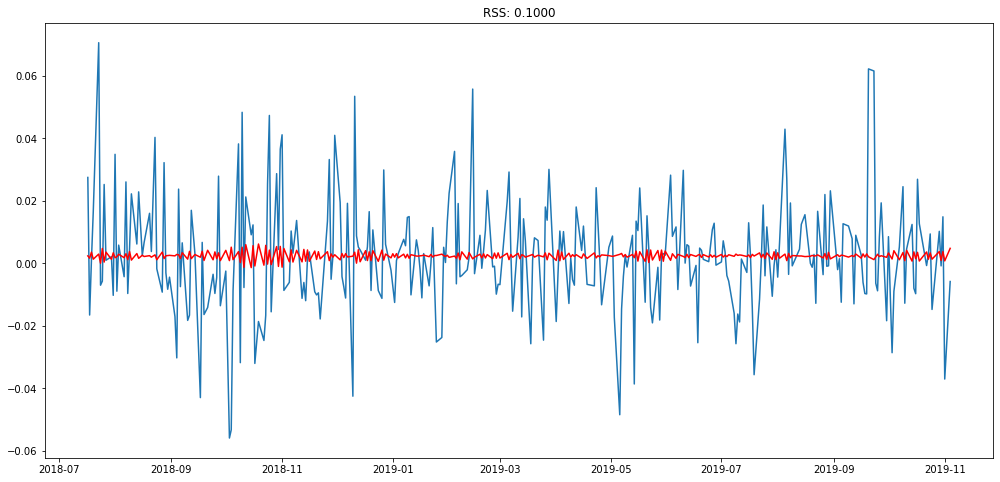

In [30]:
# ARIMA model

model = ARIMA(indexClosingPrice_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(17, 8))
plt.plot(indexClosingPrice_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-indexClosingPrice_log_diff)**2))
warnings.filterwarnings("ignore")

In [41]:
# AR and MA models have almost the same Residual Sum of Squares (RSS) but combined is significantly better. 

Taking it back to original scale

In [32]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Date
2018-07-17    0.002380
2018-07-18    0.001655
2018-07-19    0.003572
2018-07-20    0.001327
2018-07-23    0.002960
dtype: float64


In [33]:
# An easy way to add base to first number (which doesn't have a number to be subtracted from)
# it is to first determine the cumulative sum at index and then add it to the base number. 
# The cumulative sum can be found as:

In [34]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Date
2018-07-17    0.002380
2018-07-18    0.004035
2018-07-19    0.007607
2018-07-20    0.008934
2018-07-23    0.011894
dtype: float64


In [35]:
# You can quickly do some back of mind calculations using previous output to check if these are correct. Next we’ve to add them to base number. For this lets create a series with all values as base number and add the differences to it. This can be done as:

In [36]:
predictions_ARIMA_log = pd.Series(indexClosingPrice_log.iloc[0], index=indexClosingPrice_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2018-07-16    6.707718
2018-07-17    6.710097
2018-07-18    6.711753
2018-07-19    6.715325
2018-07-20    6.716652
dtype: float64

In [37]:
# Here the first element is base number itself and from thereon the values cumulatively added. Last step is to take the exponent and compare with the original series.

Text(0.5, 1.0, 'RMSE: 96.1368')

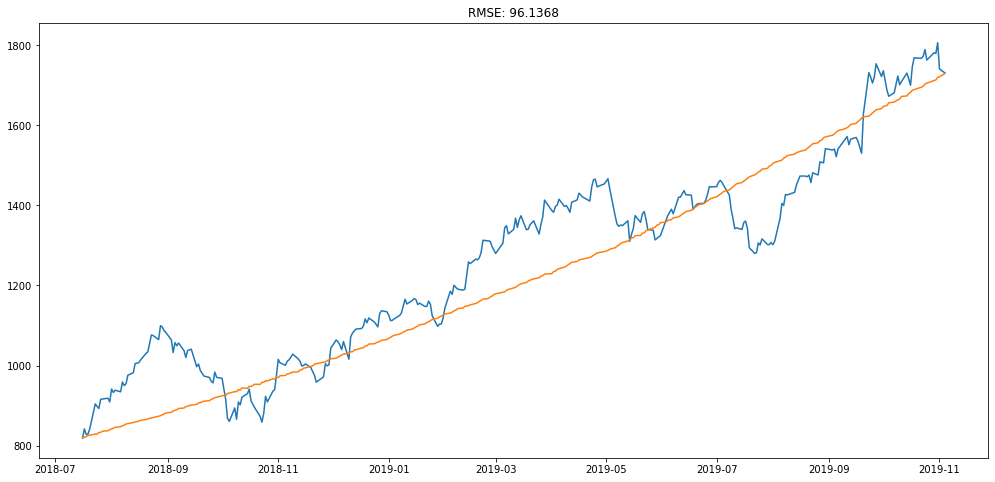

In [38]:
#RMSE: give more weight to predictions that are grossly wrong and  have the same units as the original data.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(17, 8))
plt.plot(indexClosingPrice)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexClosingPrice)**2)/len(indexClosingPrice)))